<a href="https://colab.research.google.com/github/varshum12/Deep-Learning-23sep-2025-weekday/blob/main/binary_classification_nn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as  pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt


In [ ]:
df  =  pd.read_csv('e_commerce.csv')

#### basic  checks

In [ ]:
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110.0,197,87,244.7,91,11.01,10.0,3,2.70,1.0,0
1,107,415,3717191,no,yes,26,162,27,17,123.0,196,103,254.4,103,11.45,13.7,3,3.70,1.0,0
2,137,415,3581921,no,no,0,243,41,10,114.0,121,110,162.6,104,7.32,12.2,5,3.29,0.0,0
3,84,408,3759999,yes,no,0,299,51,5,71.0,62,88,196.9,89,8.86,6.6,7,1.78,2.0,0
4,75,415,3306626,yes,no,0,167,28,13,113.0,148,122,186.9,121,8.41,10.1,3,2.73,3.0,0


In [ ]:
df.columns

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3281 non-null   float64
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

In [ ]:
df.isnull().sum()

,0
account length,0
location code,0
user id,0
credit card info save,0
push status,0
add to wishlist,0
desktop sessions,0
app sessions,0
desktop transactions,0
total product detail views,52


In [ ]:
df.duplicated().sum()

np.int64(0)

## seperate  x and  y

In [ ]:
x  =  df.drop('churn' , axis  = 1)
y  =  df['churn']

In [ ]:
## seperate cat and  numerical data
cat  =  x.columns[x.dtypes =='object']
num  =  x.columns[x.dtypes !='object']

In [ ]:
print(cat)
print()
print(num)

Index(['credit card info save', 'push status'], dtype='object')

Index(['account length', 'location code', 'user id', 'add to wishlist',
       'desktop sessions', 'app sessions', 'desktop transactions',
       'total product detail views', 'session duration', 'promotion clicks',
       'avg order value', 'sale product views',
       'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls'],
      dtype='object')


In [ ]:
# create  pipeline

In [ ]:
from  sklearn.pipeline import Pipeline
from  sklearn.compose import ColumnTransformer
from  sklearn.preprocessing  import OneHotEncoder ,  StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
num_pipeline  = Pipeline(steps =  [('imputer' ,  SimpleImputer(strategy  =  'mean' ) ) ,
                                   ('scaler' ,  StandardScaler())])

cat_pipeline  =  Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy  =  'most_frequent')) ,
 ('encoder' ,  OneHotEncoder(handle_unknown= 'ignore' , sparse_output=True))])

In [ ]:
pre  =  ColumnTransformer([('num' , num_pipeline  ,  num) ,
                           ('cat' , cat_pipeline  ,  cat)])

In [ ]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['account length', 'location code', 'user id', 'add to wishlist',
       'desktop sessions', 'app sessions', 'desktop transactions',
       'total product detail views', 'session duration', 'promotion clicks',
       'avg order value', 'sale product views',
       'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['credit card info save', 'push status'], dtype='object'))])

In [ ]:
# transform data
x_scaled  =  pre.fit_transform(x )

In [ ]:
x_scaled =  pd.DataFrame(x_scaled  ,  columns  =  pre.get_feature_names_out())

In [ ]:
x_scaled

,num__account length,num__location code,num__user id,num__add to wishlist,num__desktop sessions,num__app sessions,num__desktop transactions,num__total product detail views,num__session duration,num__promotion clicks,...,num__sale product views,num__discount rate per visited products,num__product detail view per app session,num__app transactions,num__add to cart per session,num__customer service calls,cat__credit card info save_no,cat__credit card info save_yes,cat__push status_no,cat__push status_yes
0,0.676489,-0.523603,0.285359,1.234883,1.564550,1.557193,-0.020265,4.750568e-01,-0.079666,-0.658138,...,-0.465494,0.866029,-0.088063,-0.601195,-0.085690,-0.430100,1.0,0.0,0.0,1.0
1,0.149065,-0.523603,-0.105965,1.307948,-0.327130,-0.384977,-0.020265,1.129111e+00,-0.099387,0.145038,...,0.147825,1.059390,1.249269,-0.601195,1.241169,-0.430100,1.0,0.0,0.0,1.0
2,0.902529,-0.523603,-0.598534,-0.591760,1.160502,1.125600,-1.639456,6.763043e-01,-1.578480,0.496427,...,0.198935,-0.755571,0.707108,0.211534,0.697156,-1.196647,1.0,0.0,1.0,0.0
3,-0.428590,-0.688834,0.049915,-0.591760,2.188988,2.204583,-2.796021,-1.487106e+00,-2.742033,-0.607939,...,-0.567714,-0.078806,-1.316962,1.024263,-1.306401,0.336447,0.0,1.0,1.0,0.0
4,-0.654629,-0.523603,-1.600987,-0.591760,-0.235301,-0.277078,-0.945517,6.259924e-01,-1.046007,1.098809,...,1.067803,-0.276562,-0.051918,-0.601195,-0.045885,1.102994,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.283878,-0.523603,1.449212,2.038605,-0.437325,-0.384977,0.211048,-1.185235e+00,0.295038,1.299603,...,-0.874374,1.547188,-0.124207,0.617898,-0.125496,0.336447,1.0,0.0,0.0,1.0
3329,-0.830437,-0.523603,-0.156653,-0.591760,0.940112,0.909803,-0.945517,7.149746e-16,-0.947401,-2.264489,...,1.170023,-0.188670,-0.232639,-0.194831,-0.231645,1.102994,1.0,0.0,1.0,0.0
3330,-1.835055,1.718817,-1.667974,-0.591760,0.021821,0.046617,1.830239,4.247450e-01,1.734688,-2.113894,...,-0.465494,-0.175486,1.393846,0.617898,1.387123,0.336447,1.0,0.0,1.0,0.0
3331,2.082955,1.718817,-0.363811,-0.591760,0.627893,0.586108,-0.714204,2.234975e-01,-0.809352,-0.808733,...,1.885562,-1.221396,-1.895268,2.243356,-1.876950,0.336447,0.0,1.0,1.0,0.0


In [ ]:
## train test split
from sklearn.model_selection  import train_test_split

In [ ]:
x_train  , x_test  , y_train , y_test  =  train_test_split(x_scaled  ,  y  ,
                                                           test_size  = 0.2 ,
                                                           random_state  =  3)

In [ ]:
## create  neural network  architechture


In [ ]:
from keras.models import Sequential
from keras.layers  import Dropout ,  Dense

In [ ]:
x_train.shape

(2666, 21)

In [ ]:
nn  = Sequential()

## add  input layer
nn.add(Dense(units  = 100  ,  input_dim  = (x_train.shape[1] )  , kernel_initializer= 'he_uniform'))
nn.add(Dropout(0.2))

## add  hidden layer
nn.add(Dense(units  =  400 ,  activation  =  'relu' ,  kernel_initializer= 'he_uniform') )
nn.add(Dropout(0.4))

nn.add(Dense(units  =  400 ,  activation  =  'relu' ,kernel_initializer= 'he_uniform') )
nn.add(Dropout(0.4))

nn.add(Dense(units  =  500 ,  activation  =  'relu' ,kernel_initializer= 'he_uniform' ) )
nn.add(Dropout(0.5))

##  add  output layer
nn.add(Dense(units =  1  ,  activation  =  'sigmoid' , kernel_initializer= 'glorot_uniform'))



In [ ]:
## compile
nn.compile(optimizer  =  'adam' , loss  ='binary_crossentropy'  ,  metrics  =['accuracy'])

In [ ]:
##  fit model

hist =  nn.fit(x_train  ,  y_train  , epochs  =  50  ,  validation_split= 0.2   )

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.7684 - loss: 1.1206 - val_accuracy: 0.8670 - val_loss: 0.3778
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8326 - loss: 0.5711 - val_accuracy: 0.8727 - val_loss: 0.3031
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8344 - loss: 0.4888 - val_accuracy: 0.8876 - val_loss: 0.2902
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8352 - loss: 0.4697 - val_accuracy: 0.8933 - val_loss: 0.2792
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8765 - loss: 0.3691 - val_accuracy: 0.9007 - val_loss: 0.2744
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8724 - loss: 0.3321 - val_accuracy: 0.9064 - val_loss: 0.2753
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8888 - loss: 0.2984 - val_accuracy: 0.8933 - val_loss: 0.2639
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8643 - loss: 0.3552 - val_accuracy: 0.9139 - val_loss

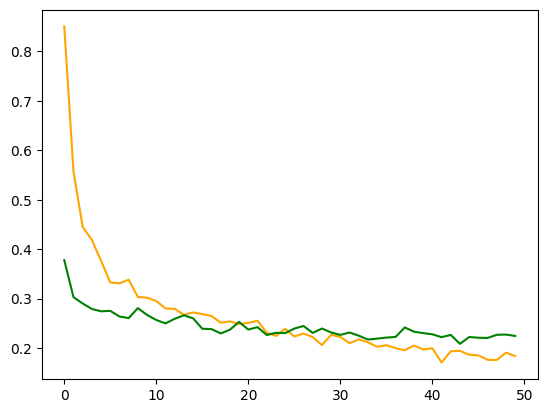

In [ ]:
plt.plot(hist.history['loss'] ,  c = 'orange')
plt.plot(hist.history['val_loss'] ,  c= 'green')

In [ ]:
nn.evaluate(x_train  , y_train)

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9730 - loss: 0.1240


[0.14277906715869904, 0.9654913544654846]

In [ ]:
nn.evaluate(x_test  ,  y_test)

In [ ]:
nn.evaluate(x_test ,  y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9157 - loss: 0.2631


[0.2152344137430191, 0.9370315074920654]

In [ ]:
##  evelaute  by  other  metrics

In [ ]:

from  sklearn.metrics  import  classification_report ,  confusion_matrix

In [ ]:
train_pred  =  nn.predict(x_train)
ytrain_pred = []
for  i  in train_pred :
  if i >= 0.5:
    ytrain_pred.append(1)
  else:
    ytrain_pred.append(0)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:

print(classification_report(y_train  ,  ytrain_pred))
print(confusion_matrix(    y_train , ytrain_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2277
           1       0.93      0.83      0.87       389

    accuracy                           0.97      2666
   macro avg       0.95      0.91      0.93      2666
weighted avg       0.96      0.97      0.96      2666

[[2253   24]
 [  68  321]]
